In [197]:
#This is a classification problem where we have to predict whether a loan will be approved or not.

In [198]:
#Importing libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [200]:
df=pd.read_csv('loan_prediction.csv')

In [201]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [202]:
df.shape

(614, 13)

In [203]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [205]:
#Note: There are 3 data types in the data

#object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
#int64: It represents the integer variables. ApplicantIncome is of this format.
#float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

In [206]:
#Data Exploration , analysis and Visualization

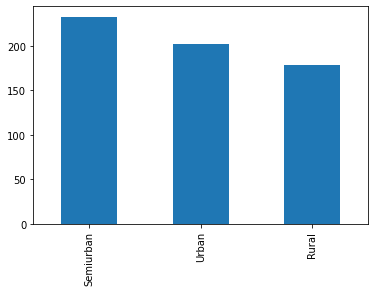

In [207]:
df['Property_Area'].value_counts().plot.bar()

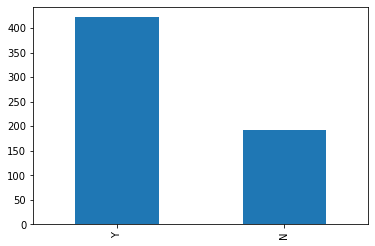

In [208]:
df['Loan_Status'].value_counts().plot.bar()

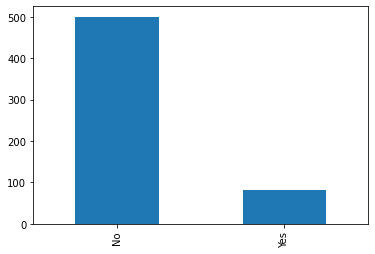

In [209]:
df['Self_Employed'].value_counts().plot.bar()

In [210]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

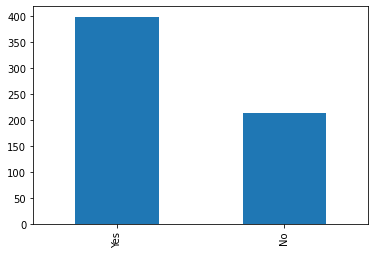

In [211]:
df['Married'].value_counts().plot.bar()

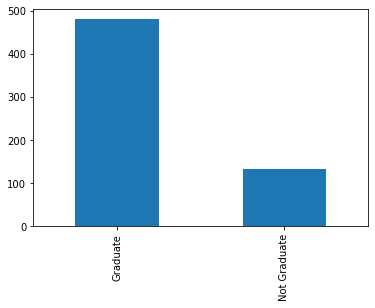

In [212]:
df['Education'].value_counts().plot.bar()

In [213]:
#Check distribution of applicant income

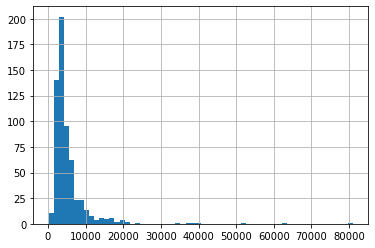

In [214]:
df['ApplicantIncome'].hist(bins=60)

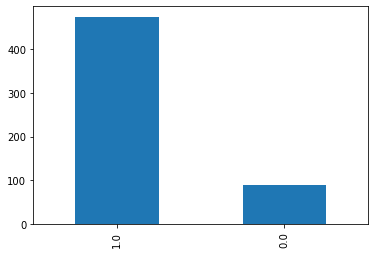

In [215]:
df['Credit_History'].value_counts().plot.bar()

In [216]:
#Numerical variable

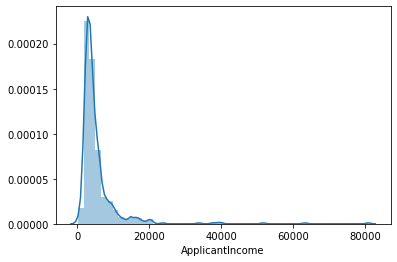

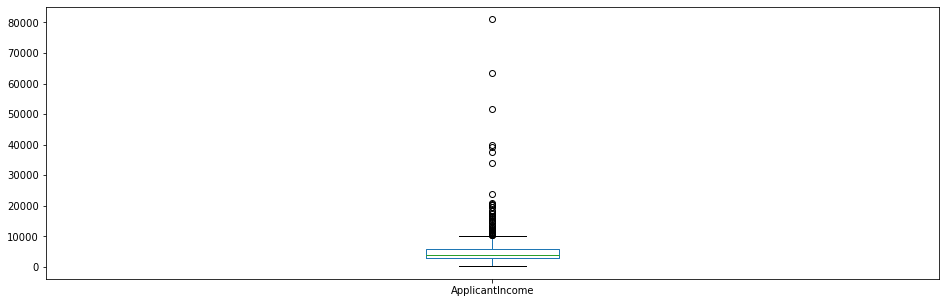

In [217]:
sns.distplot(df['ApplicantIncome'])
plt.show()
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [218]:
#Most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

#The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

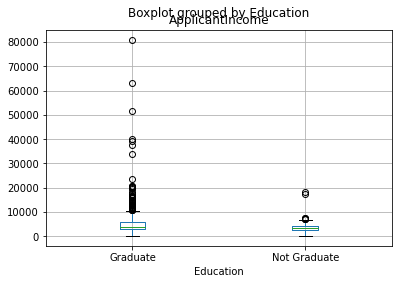

In [219]:
df.boxplot(column='ApplicantIncome', by = 'Education') 


In [220]:
#We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

In [221]:
#Coapplicant income

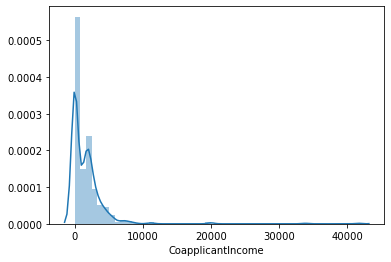

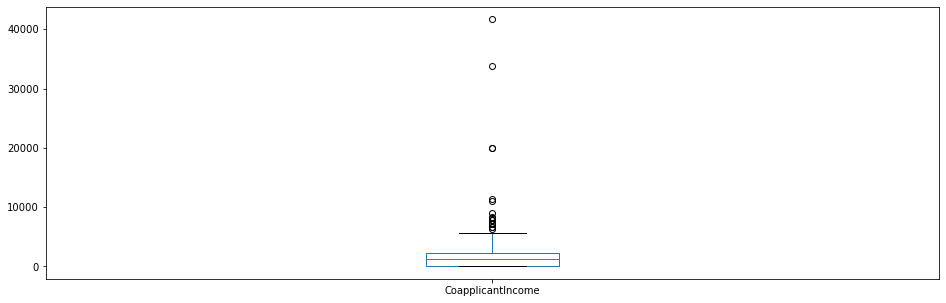

In [222]:
sns.distplot(df['CoapplicantIncome'])
plt.show()
df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [223]:

#We see a similar distribution as that of the applicant's income. 
#The majority of co-applicants income ranges from 0 to 5000. 
#We also see a lot of outliers in the applicant's income and it is not normally distributed.

In [224]:
#Loan Amount

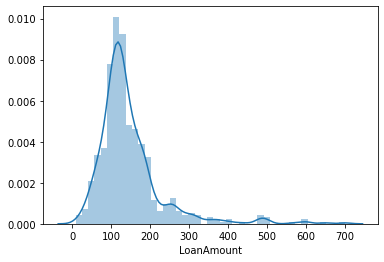

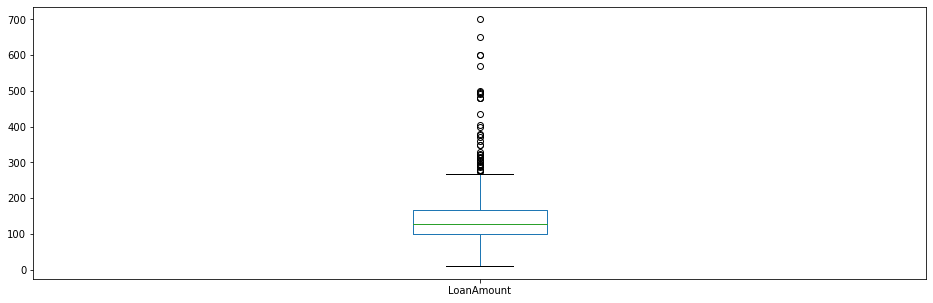

In [225]:
sns.distplot(df['LoanAmount'])
plt.show()
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [226]:

#We will treat the outliers in later sections.

In [227]:
#Bivariate Analysis

In [228]:
#Categorical Independent Variable vs Target Variable

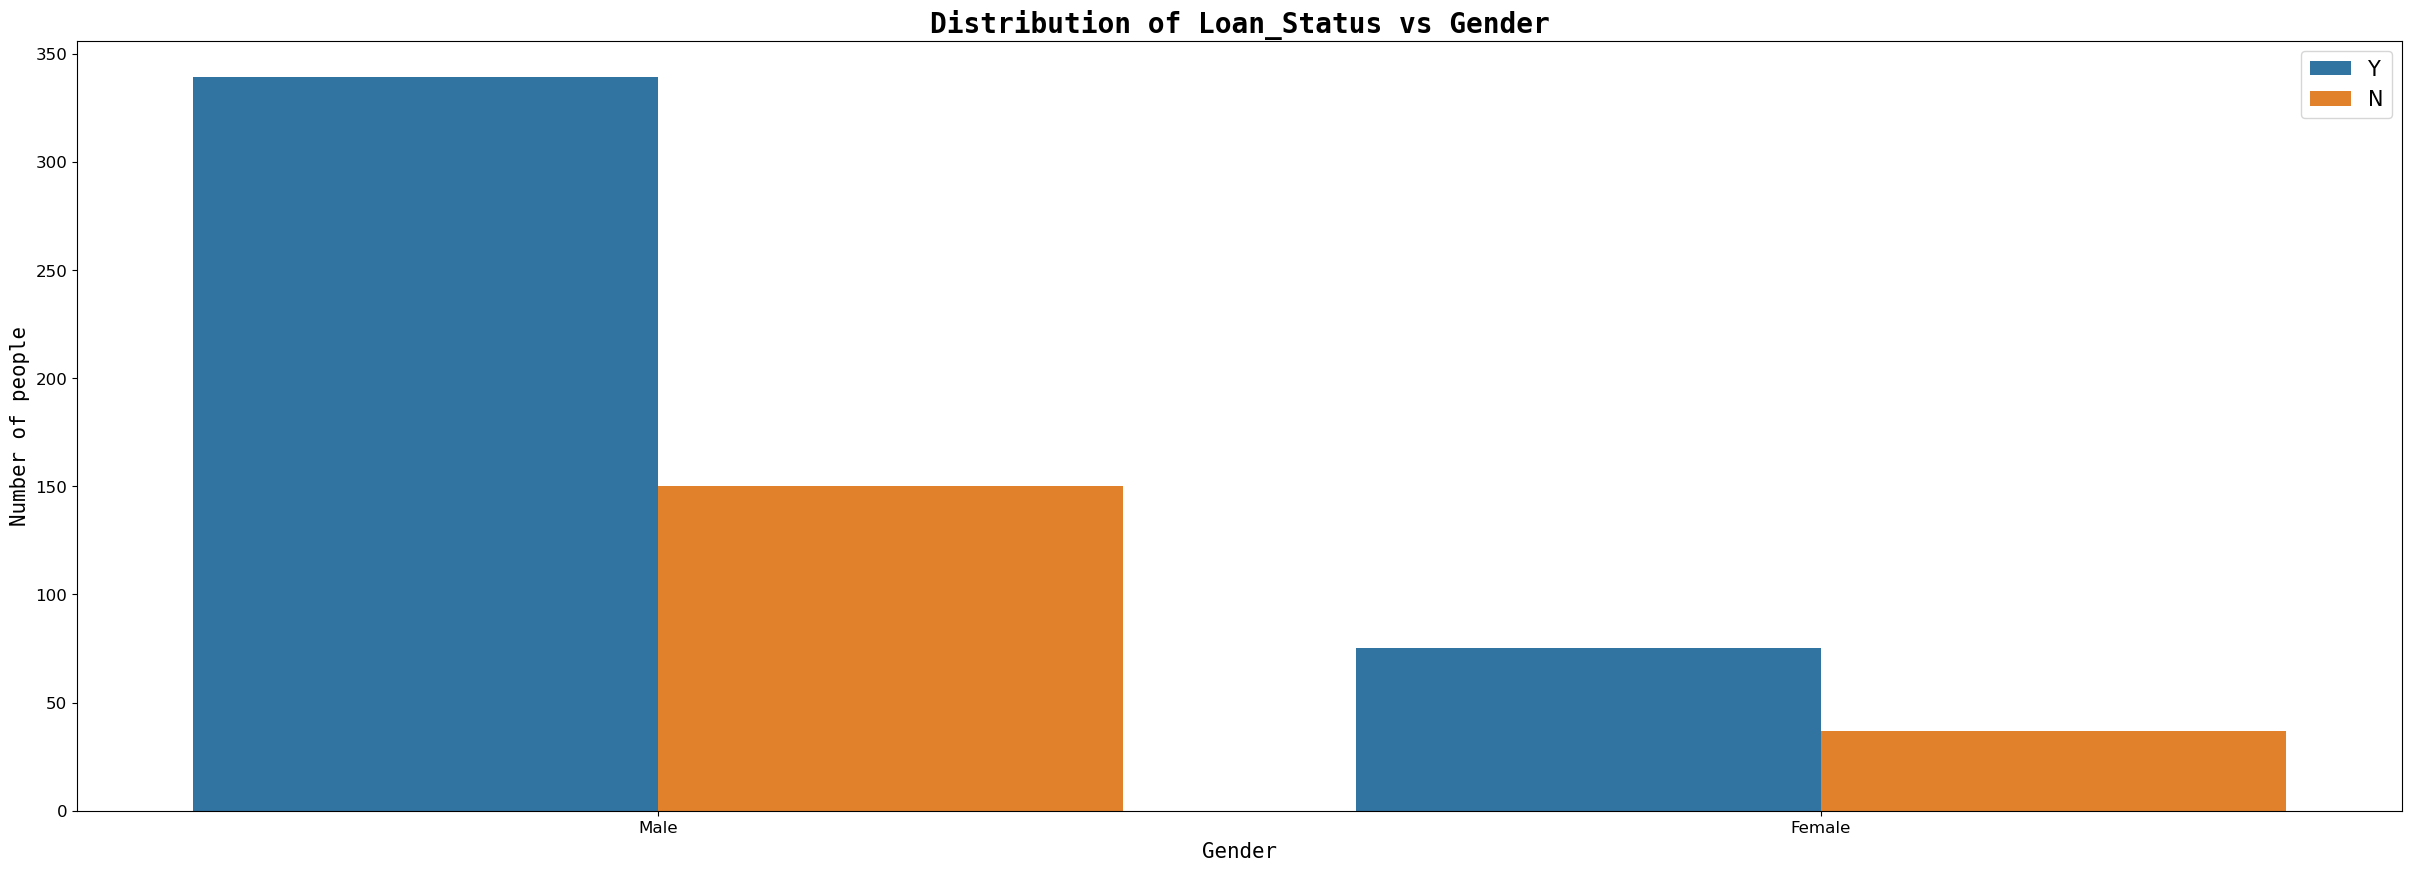

In [229]:

plt.style.use('default')
plt.figure(figsize=(30, 10))
sns.countplot(df['Gender'], hue=df['Loan_Status'])
plt.title('Distribution of Loan_Status vs Gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [230]:
#It can be inferred that the proportion of male applicant is more for approved loans.

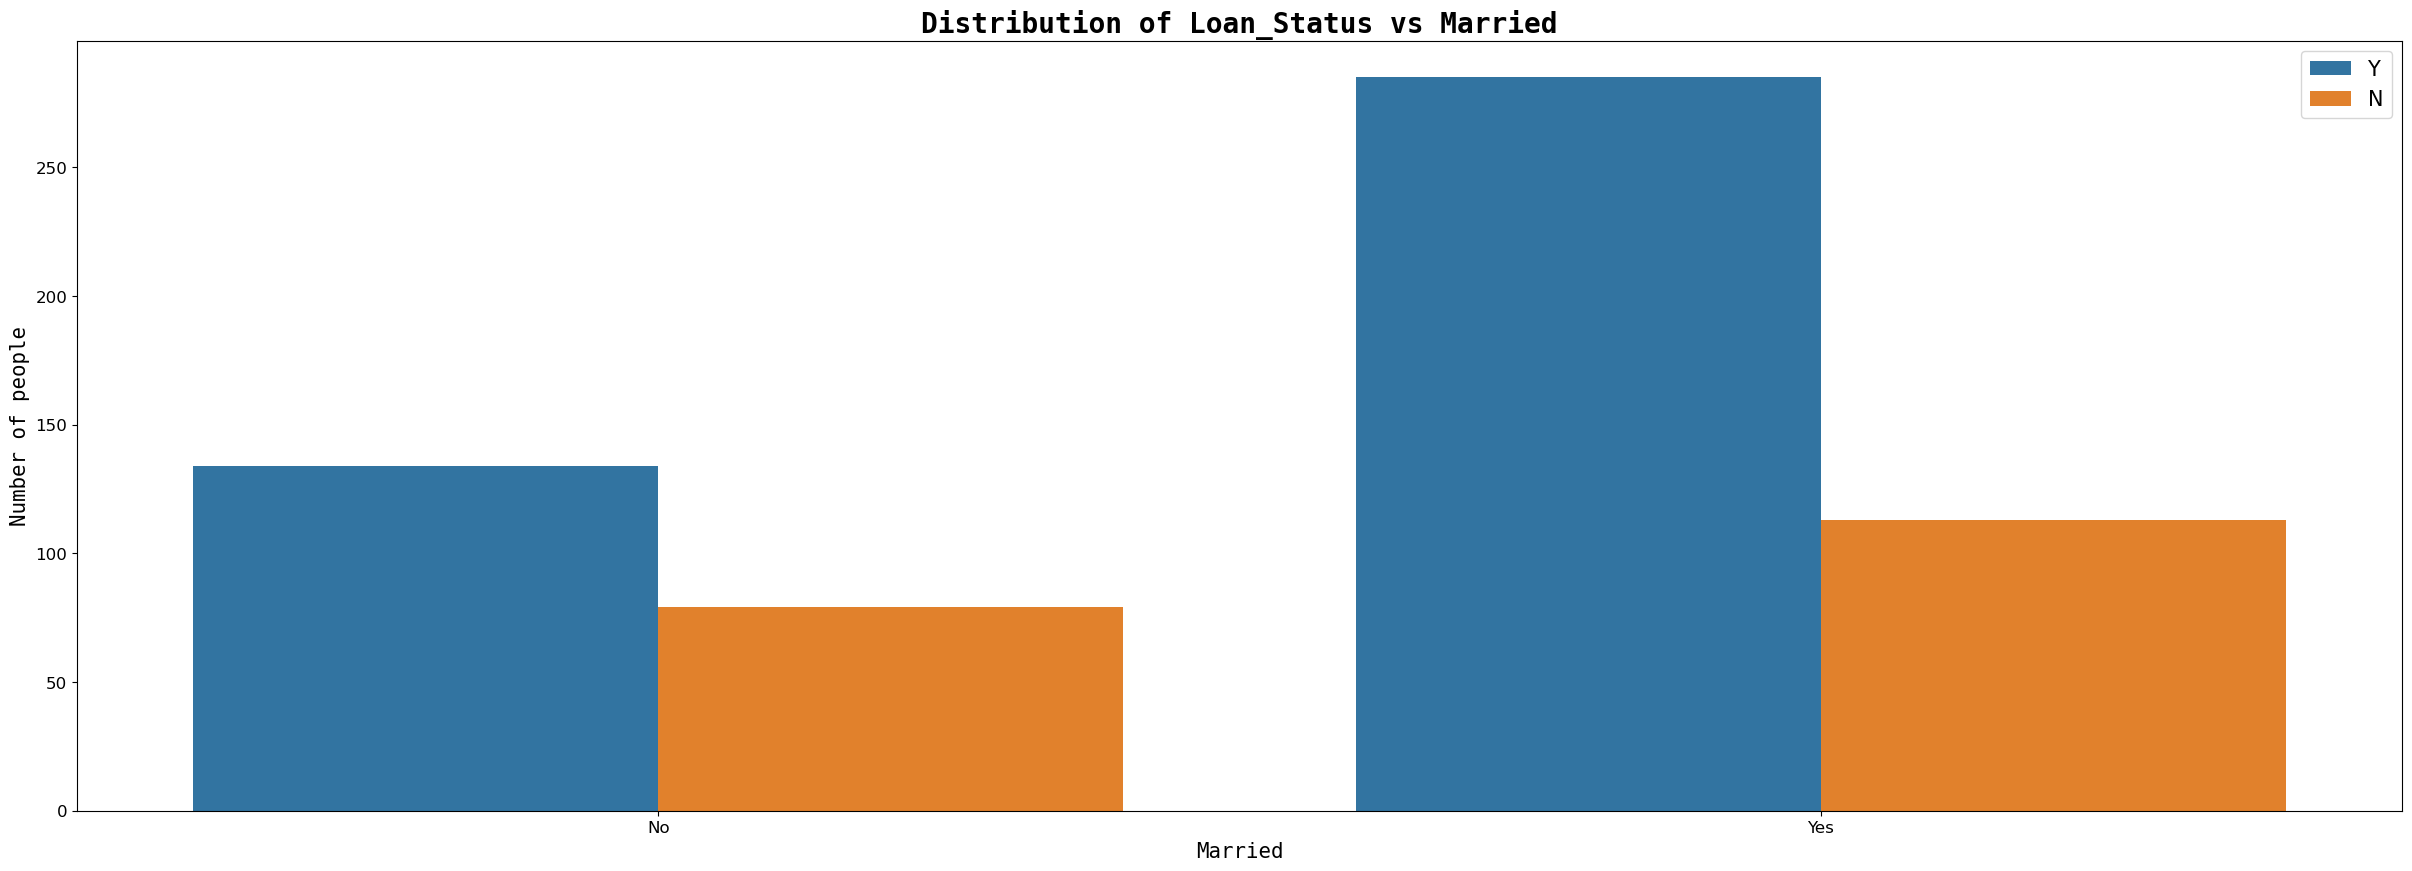

In [231]:
plt.style.use('default')
plt.figure(figsize=(30, 10))
sns.countplot(df['Married'], hue=df['Loan_Status'])
plt.title('Distribution of Loan_Status vs Married', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Married', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [232]:
#It can be inferred that loan approval and sttaus of applicant is more for married people

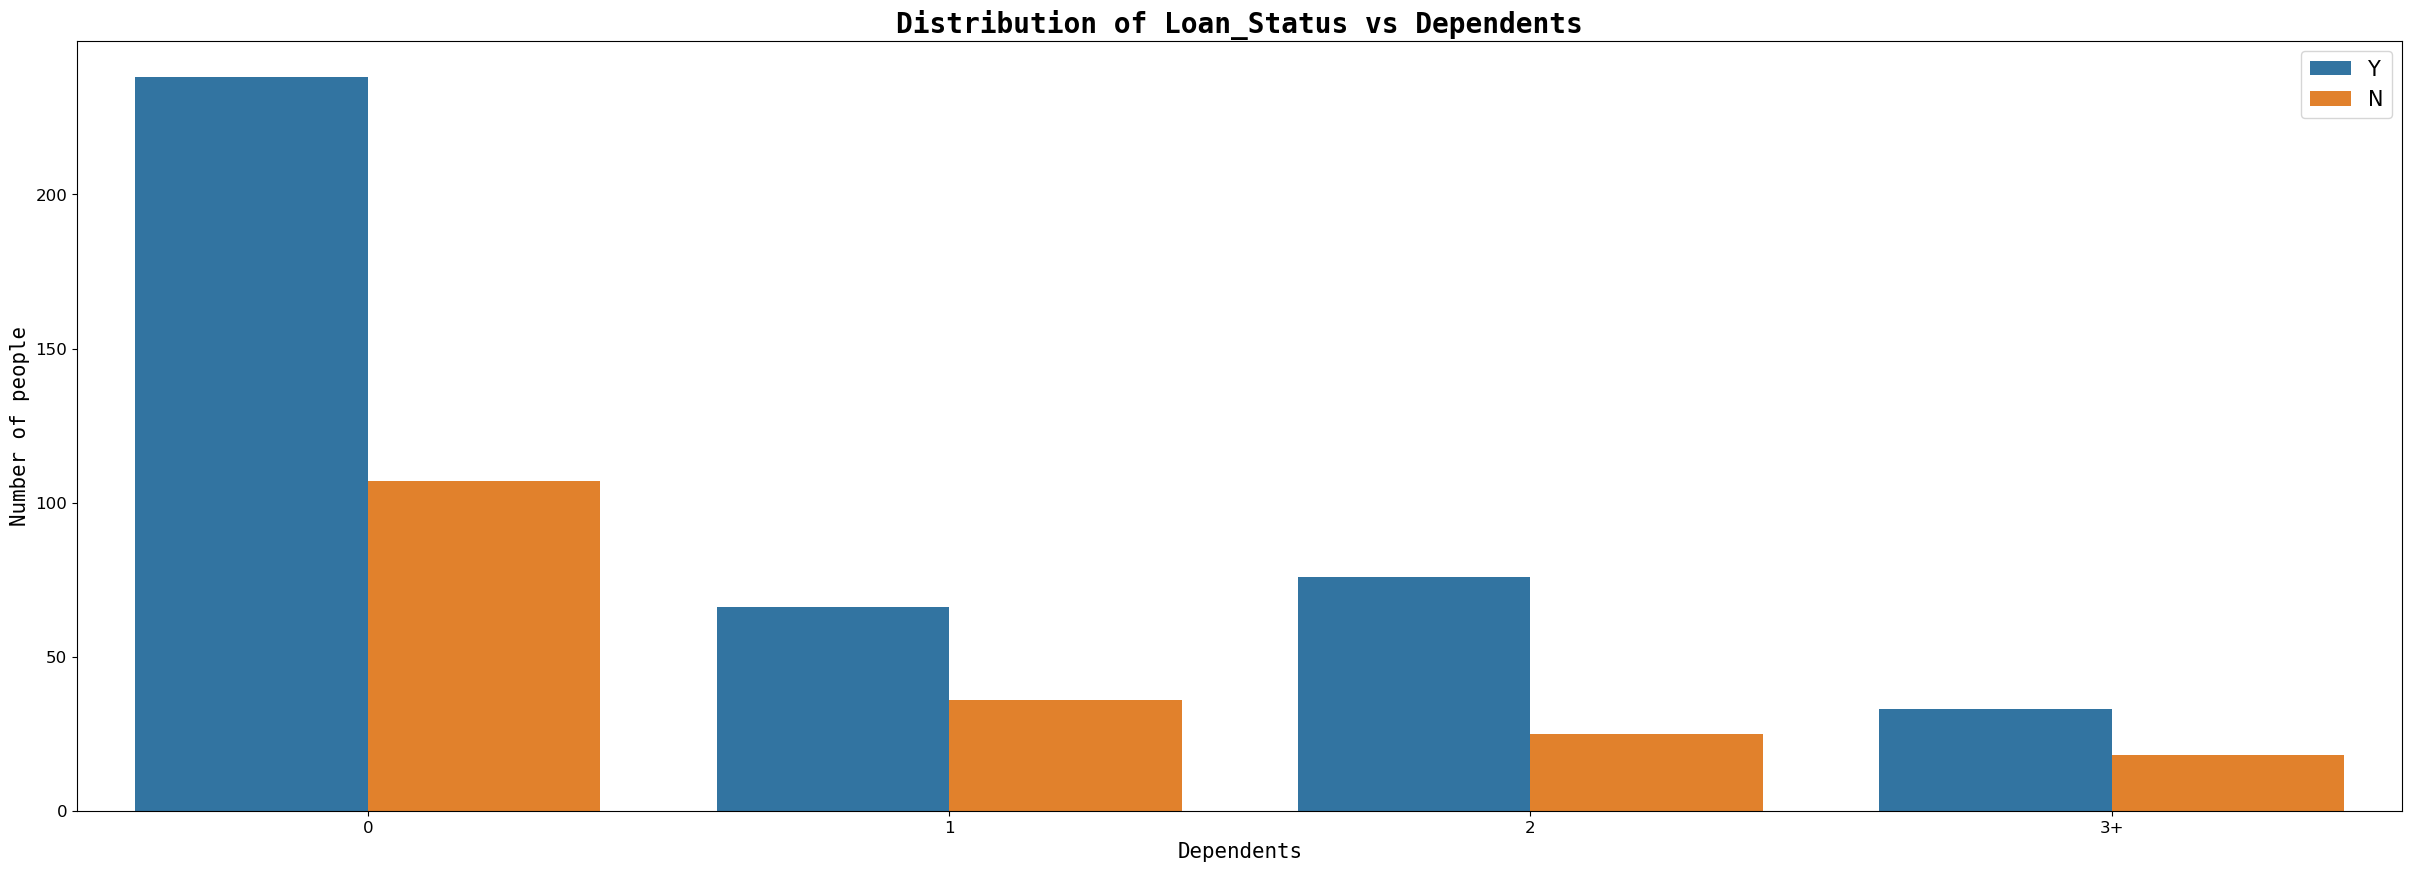

In [233]:
plt.style.use('default')
plt.figure(figsize=(30, 10))
sns.countplot(df['Dependents'], hue=df['Loan_Status'])
plt.title('Distribution of Loan_Status vs Dependents', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Dependents', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [234]:
#With less number of dependents the chances of loan approval are high

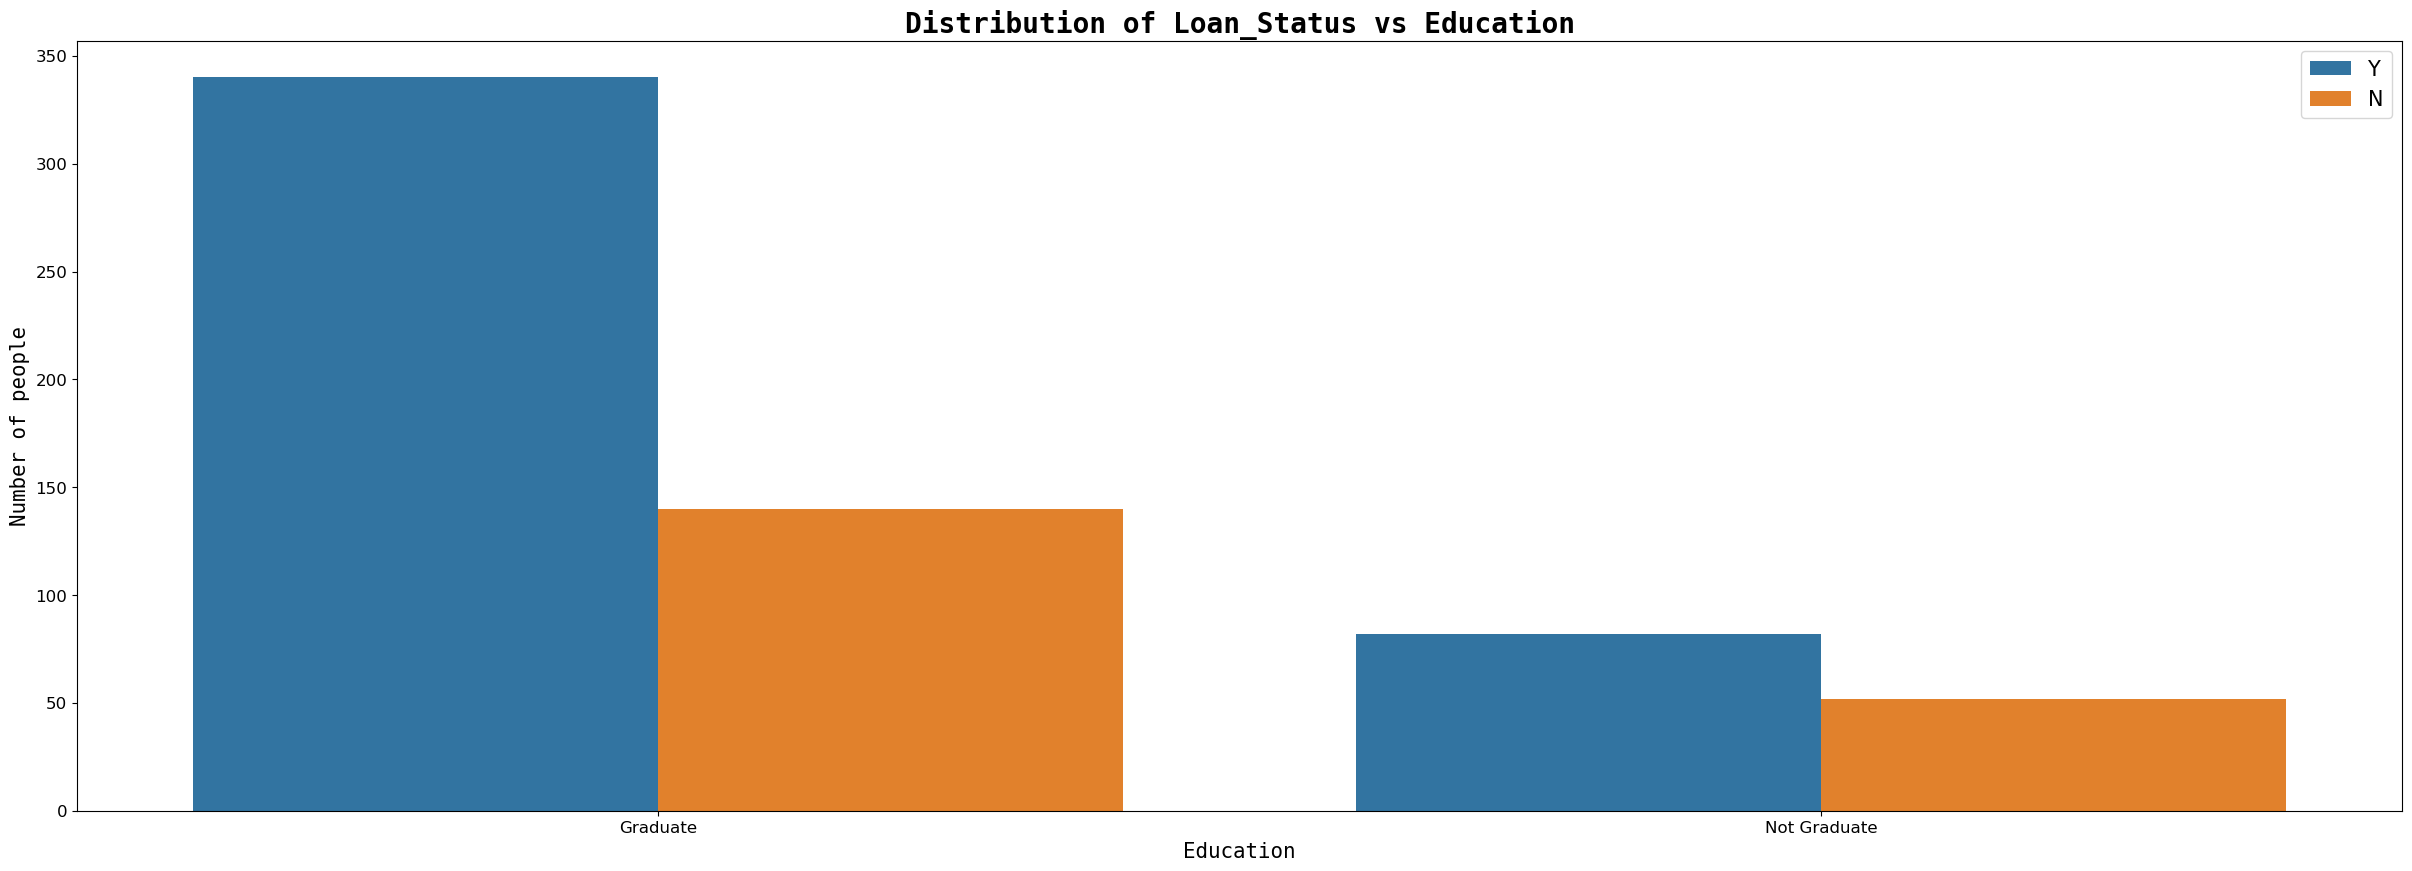

In [235]:
plt.style.use('default')
plt.figure(figsize=(30, 10))
sns.countplot(df['Education'], hue=df['Loan_Status'])
plt.title('Distribution of Loan_Status vs Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [236]:
#Chances of loan approval is high for graduates

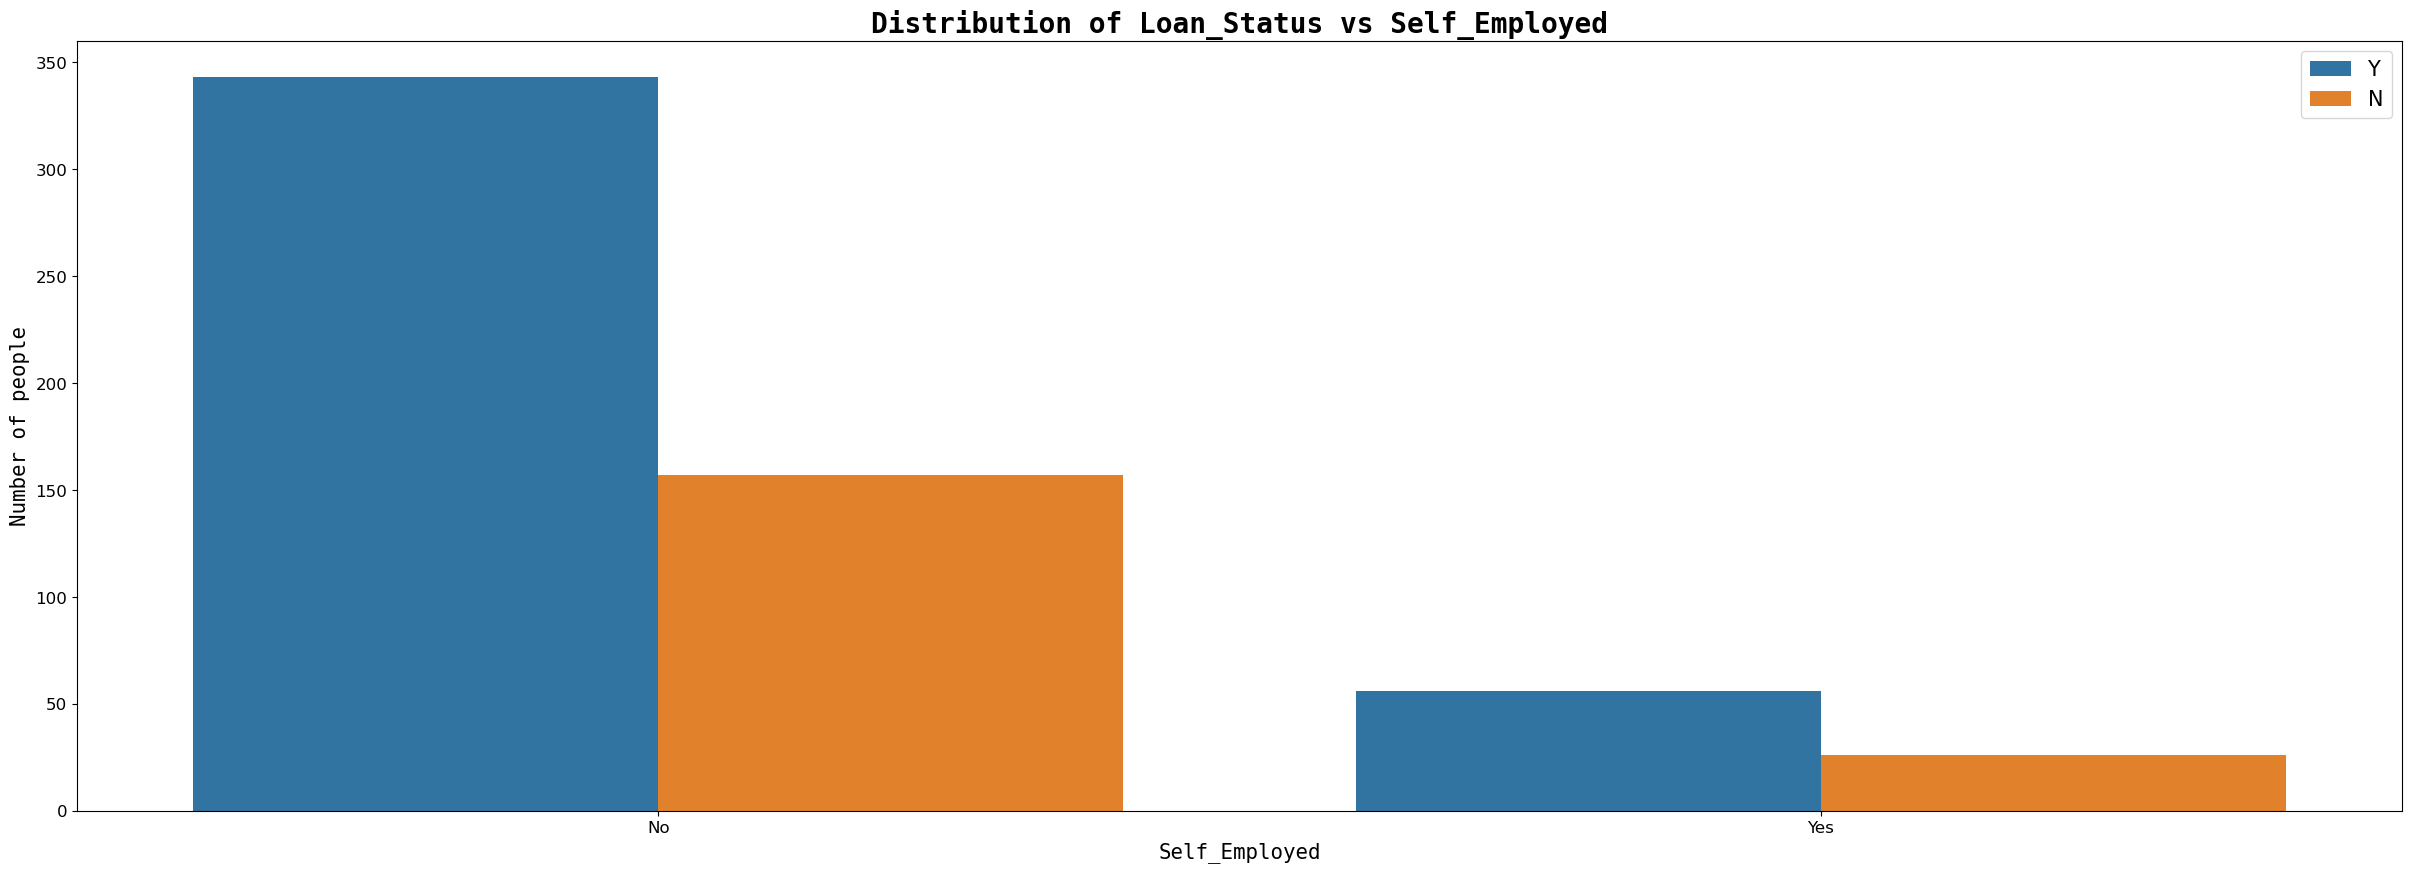

In [237]:
plt.style.use('default')
plt.figure(figsize=(30, 10))
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])
plt.title('Distribution of Loan_Status vs Self_Employed', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Self_Employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [238]:
#Chances of approval are less in self employed state

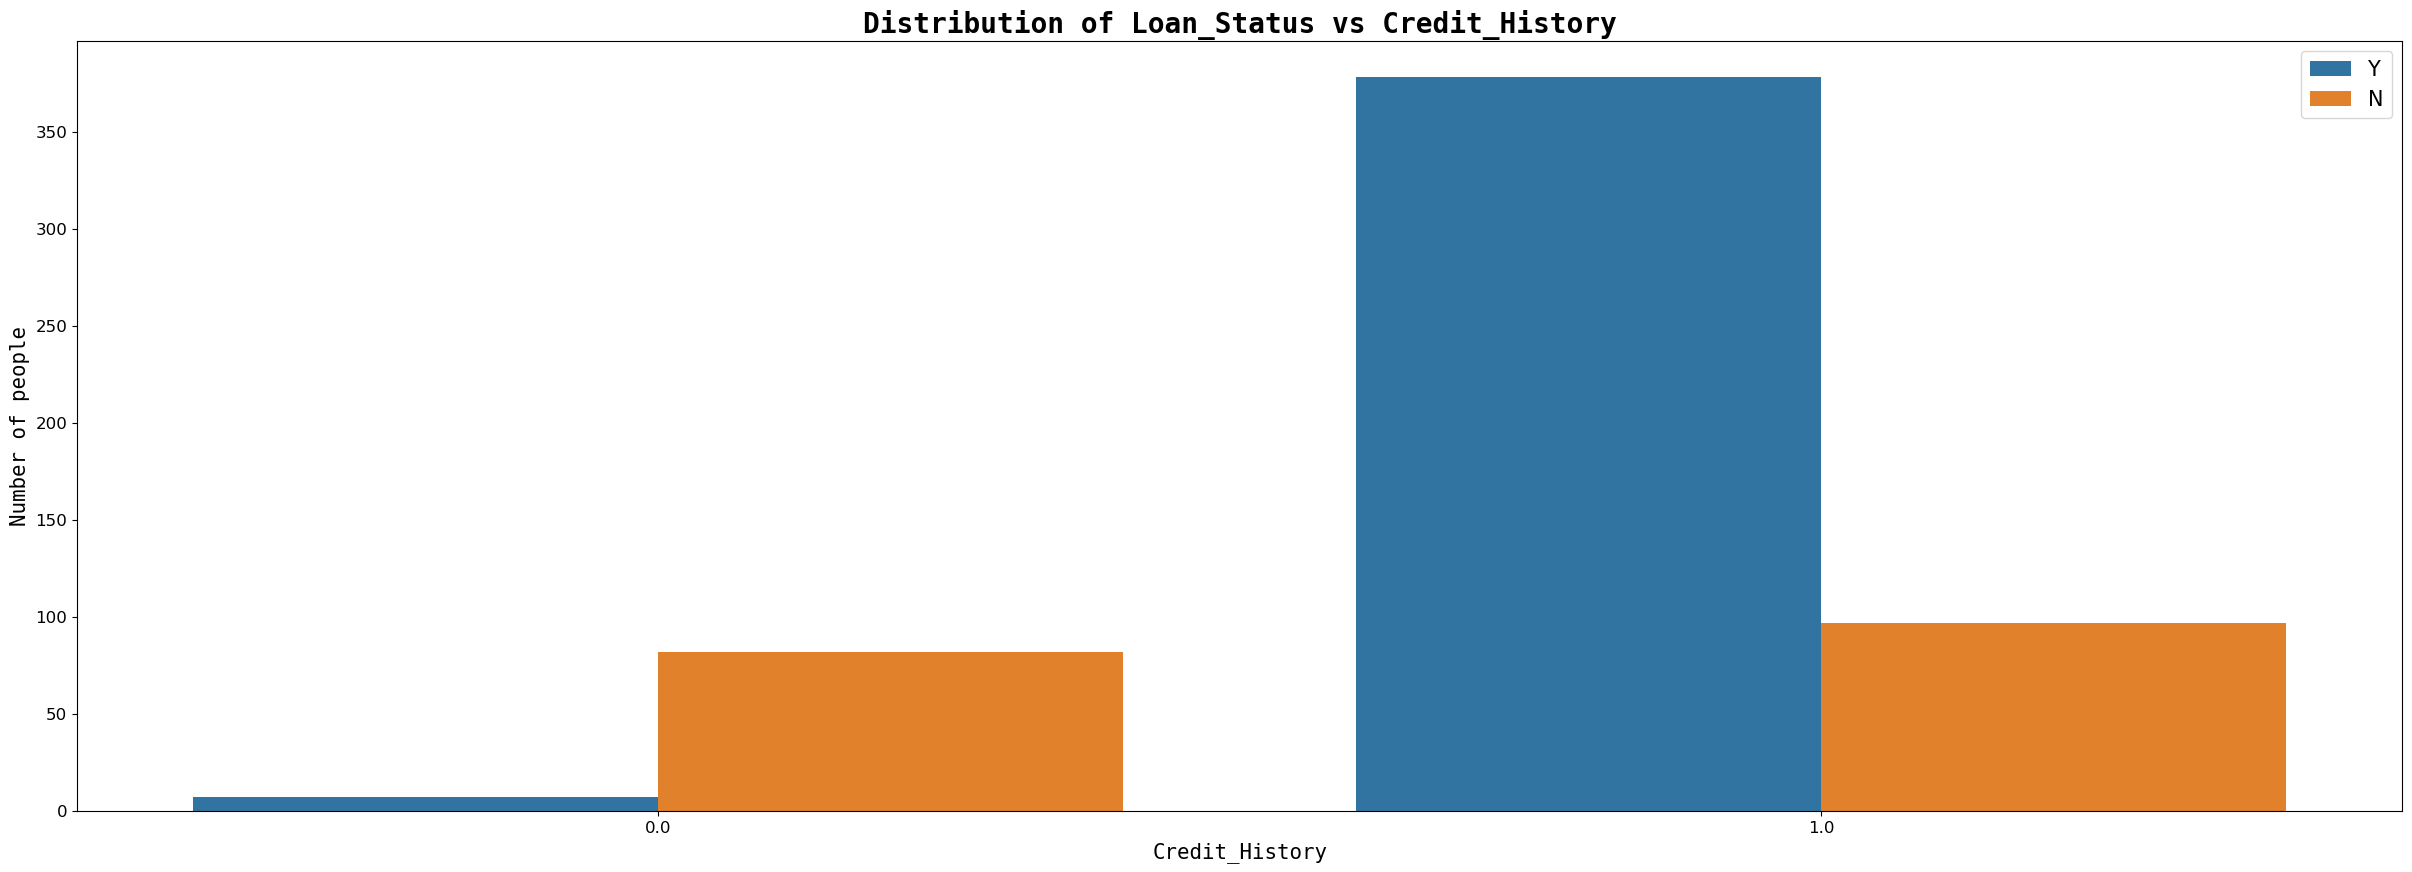

In [239]:
plt.style.use('default')
plt.figure(figsize=(30, 10))
sns.countplot(df['Credit_History'], hue=df['Loan_Status'])
plt.title('Distribution of Loan_Status vs Credit_History', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Credit_History', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [240]:
#Chances of loan approval is high for credit history

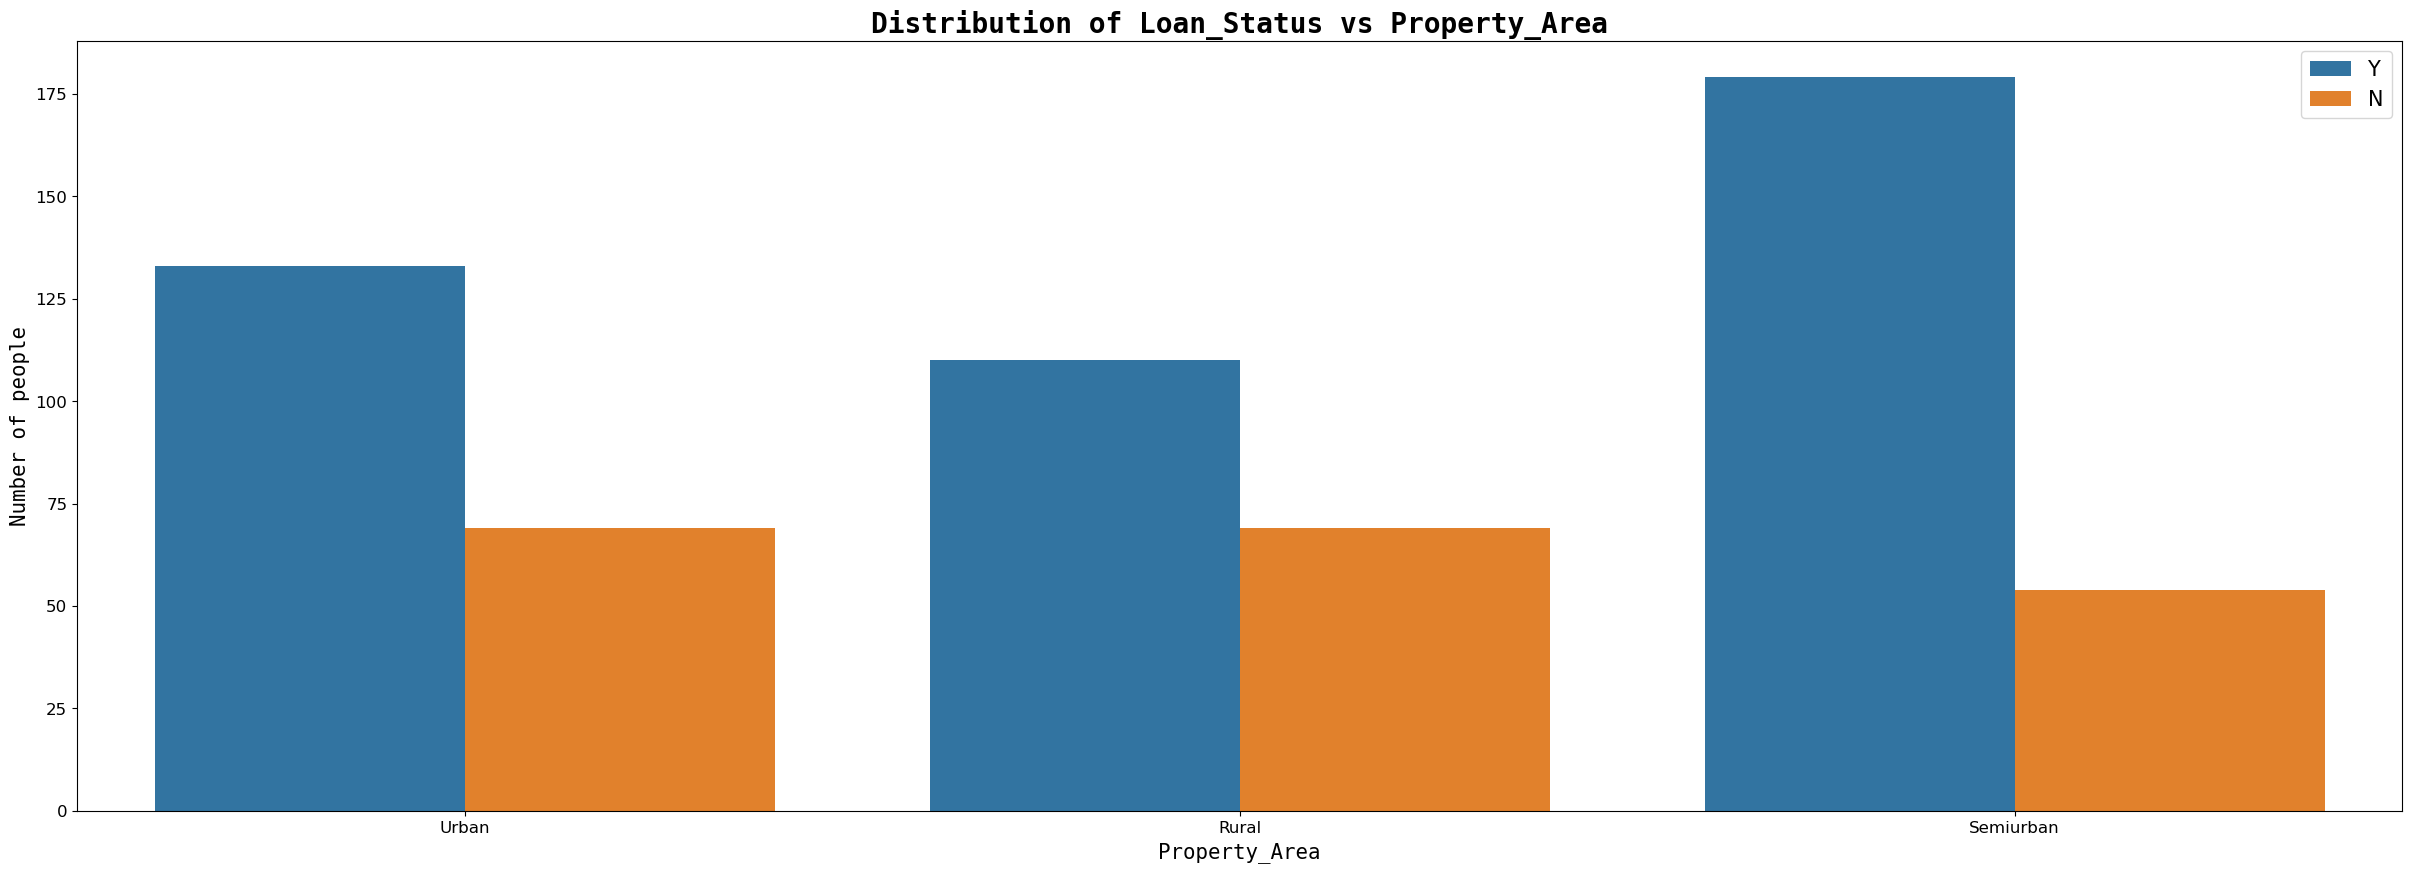

In [241]:
plt.style.use('default')
plt.figure(figsize=(30, 10))
sns.countplot(df['Property_Area'], hue=df['Loan_Status'])
plt.title('Distribution of Loan_Status vs Property_Area', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Property_Area', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [242]:
#Semi-urban people have higher chances of loan approval and urban people have higher chances of loan approval for rural area

In [243]:
#Missing values

In [244]:
df.apply(lambda x: sum(x.isnull()),axis=0) #to tell the missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [245]:
#to fill the missing values by mean for LoanAmount 
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [246]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [247]:
#Since we have maximum records as 'No',lets impute the missing values with No

In [248]:
df.Self_Employed = df.Self_Employed.fillna('No')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [249]:
##to decrease the extreme values of ApplicantIncome which can be seen from the previous barplot, we can add CoApplicantIncome to compensate the value 



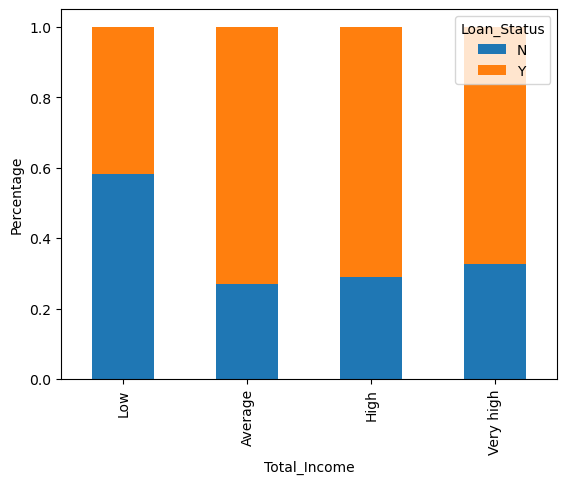

In [250]:
#Lets look at the visualization

df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
df['Total_Income_bin']=pd.cut(df['TotalIncome'],bins,labels=group)
Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

In [251]:
#We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income

In [252]:
#missing values for gender

In [253]:
gender = df['Gender'].value_counts(ascending=True)
gender.head()

Female    112
Male      489
Name: Gender, dtype: int64

In [254]:
#Males are more in number, so we'll fill the missing values with "male"
df.Gender = df.Gender.fillna('Male')

In [255]:
#Impute the values for Married

In [256]:
md = df['Married'].value_counts()
md.head()

Yes    398
No     213
Name: Married, dtype: int64

In [257]:
#Since 'Yes' has more number of values,filling the missing values with yes
df.Married = df.Married.fillna('Yes')

In [258]:
#filling the missing values for loan_status
loan = df['Loan_Status'].value_counts()
loan.head()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [259]:
df.Loan_Status = df.Loan_Status.fillna('Y')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [260]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
TotalIncome          False
Total_Income_bin     False
dtype: bool

In [261]:
dependents = df['Dependents'].value_counts()
dependents.head()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [262]:
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )

In [263]:
df['Dependents'] = df['Dependents'].str.rstrip('+')

In [264]:
#To impute values for credit history

In [265]:
credit = df['Credit_History'].value_counts()
credit.head()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [266]:
#Since credit history is way more in number hence missing values canbe imputed with mean values

In [267]:

df.Credit_History = df.Credit_History.fillna('1.0')

In [268]:
#Impute the values for Loan Amount term

In [269]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )

In [270]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
TotalIncome          False
Total_Income_bin     False
dtype: bool

In [271]:
#All the missing values have been imputed 

In [272]:
#Correlation matrix
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,0.893037
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.342781
LoanAmount,0.565620,0.187828,1.000000,0.036475,0.620102
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.070917
TotalIncome,0.893037,0.342781,0.620102,-0.070917,1.000000


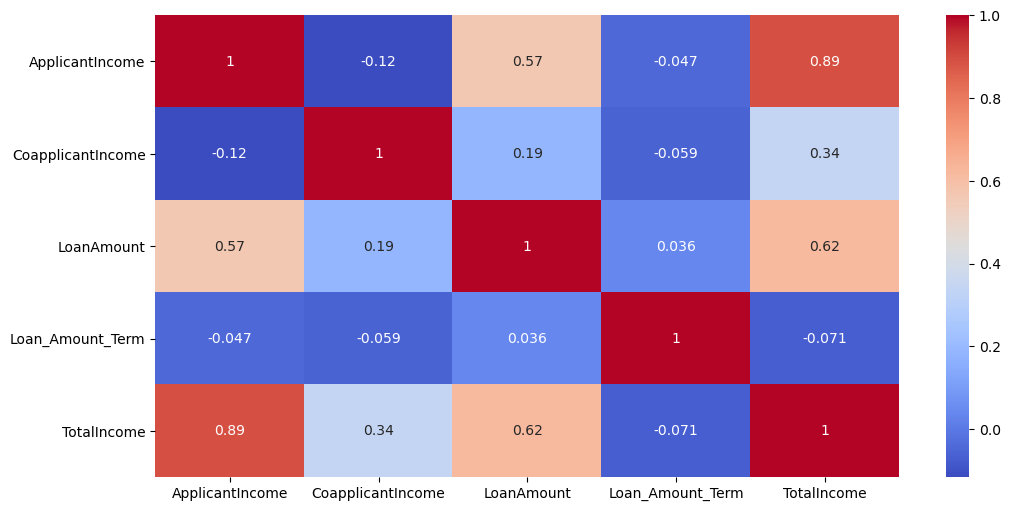

In [273]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [274]:
#Building predictive model 
# we need to convert the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
var_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()  
for i in var_col:
    df[i] = le.fit_transform(df[i]) #Fit label encoder and return encoded labels
df.dtypes

Loan_ID                object
Gender                  int32
Married                 int32
Dependents              int32
Education               int32
Self_Employed           int32
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area           int32
Loan_Status             int32
TotalIncome           float64
Total_Income_bin     category
dtype: object

In [275]:
#Building Models
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [276]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Total_Income_bin
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0,High
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0,Very high
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0,Average
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0,High
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0,High


In [191]:
#We dont see Loan ID useful in detecting the loan approval so lets drop it 

In [285]:
new_data = df.drop('Loan_ID', axis=1)


In [287]:
new_data1=new_data.drop('Total_Income_bin',axis=1)

In [289]:
X=new_data1.drop('Loan_Status',axis=1)

In [290]:
Y = df['Loan_Status']

In [291]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1,0,2900.0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1,0,4106.0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1,2,8312.0
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1,2,7583.0


In [292]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [293]:
#To remove the imbalance scaling the data

In [294]:
from sklearn.preprocessing import StandardScaler

In [295]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [296]:
#Data Splitting for Modelling

In [297]:
from sklearn.model_selection import train_test_split

In [299]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [300]:
#Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [301]:
#Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [303]:
#K Nearest Neighbor:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [304]:
#Gaussian Naive Bayes:

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [305]:
#Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [306]:
#Looping to find the best Model
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
86.13,KNN
81.51,Logistic Regression
80.78,Naive Bayes


In [307]:
#As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation

In [308]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78571429 0.80487805 0.80487805 0.7804878  0.7804878  0.75609756
 0.75609756 0.90243902 0.7804878  0.80487805]
Mean: 0.7956445993031359
Standard Deviation: 0.039467140583150886


In [309]:

#This looks much more realistic than before. Our model has a average accuracy of 80% with a standard deviation of 4 %

In [310]:
#Feature importance

In [311]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Credit_History,0.241
TotalIncome,0.164
LoanAmount,0.151
ApplicantIncome,0.147
CoapplicantIncome,0.082
Property_Area,0.051
Dependents,0.044
Loan_Amount_Term,0.044
Married,0.022


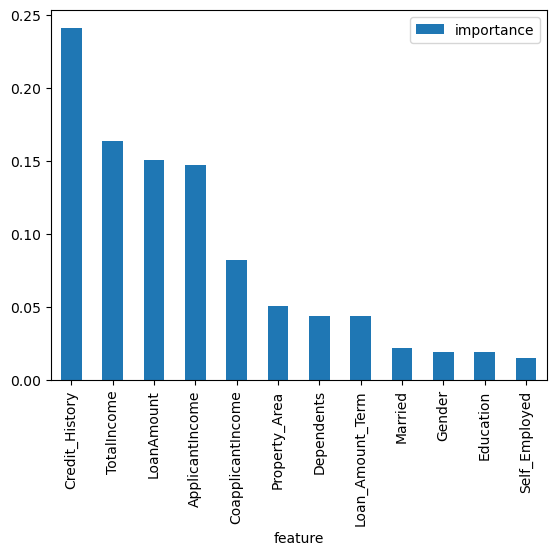

In [312]:
importances.plot.bar()

In [313]:
#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [314]:
#Hyperparameter tuning


param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]} from sklearn.model_selection import GridSearchCV, cross_val_score rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1) clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1) clf.fit(X_train, y_train) clf.bestparams

In [315]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 79.56 %


In [316]:
#Further evaluation
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[ 53,  67],
       [ 13, 278]], dtype=int64)

In [317]:

#Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8057971014492754
Recall: 0.9553264604810997


In [318]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.8742138364779876

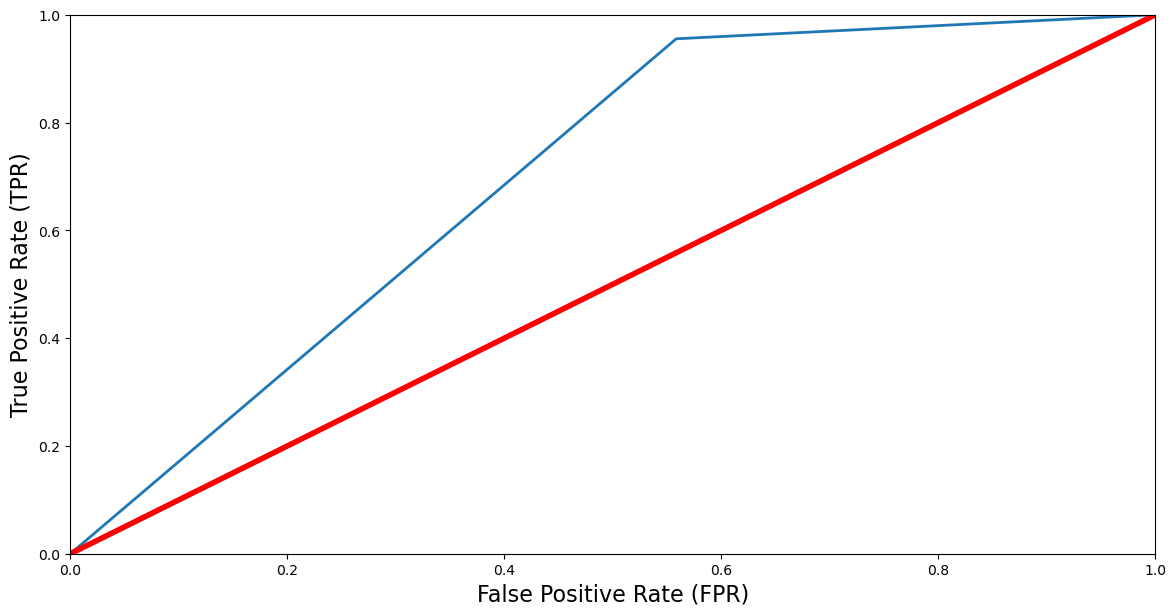

In [319]:
#ROC-AUC Curve

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, predictions)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [320]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, predictions)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6984965635738831


In [321]:
#Model Saving

import pickle
filename='Loan_application_Status.pkl'
pickle.dump(random_forest,open(filename,'wb'))

In [322]:
#Conclusion
a=np.array(Y_test)
predicted=np.array(random_forest.predict(X_test))
df_com=pd.DataFrame({"Original":a,"predicted":predicted},index=range(len(a)))
df_com

,Original,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
198,0,0
199,0,1
200,0,0
201,1,1


In [ ]:
#Randomforest classifier performed the best and hence has been chosen as the model.